In [6]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, coord_flip, theme_bw, theme, element_text,
    labs, scale_fill_manual
)
import time

def read_data(csv_path):
    """Reads the CSV file and returns a DataFrame."""
    df = pd.read_csv(csv_path)

    # === Sort within SampleClass by N_total ===
    df = df.sort_values(["SampleClass", "N_total"], ascending=[True, False])

    # === Define categorical order for plotting ===
    df["Tissue"] = pd.Categorical(df["Tissue"], categories=df["Tissue"].tolist(), ordered=True)
    return df


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (
    ggplot, aes, geom_bar, coord_flip, scale_fill_manual,
    labs, theme_bw, theme, element_text, element_blank
)
import time

def plot_data(df, dataset_name):
    # === Color palette ===

    
    palette = {
    "Low": "#5DADE2",   # soft blue
    "Medium": "#F5B041", # amber
    "High": "#E74C3C"   # coral red
}

    # === Sort by SampleClass (Low → Medium → High) and within each by N_total ===
    # === Sort by SampleClass (Low → Medium → High) and within each by N_total ===
    class_order = ["Low sample", "Medium sample", "High sample"]
    df["Tissue"] = df["Tissue"].str.title()
    df["SampleClass"] = pd.Categorical(df["SampleClass"], categories=class_order, ordered=True)
    df = df.sort_values(["SampleClass", "N_total"], ascending=[True, True])
    df["SampleClass"] = df["SampleClass"].replace({
    "Low sample": "Low",
    "Medium sample": "Medium",
    "High sample": "High"
})

    # === Reverse tissue order for correct top→bottom display ===
    df["Tissue"] = pd.Categorical(df["Tissue"], categories=df["Tissue"].tolist()[::-1], ordered=True)
    

    # === Update figure size for readability ===
    p = (
        ggplot(df, aes(x="Tissue", y="N_total", fill="SampleClass"))
        + geom_bar(stat="identity", show_legend=True, width=0.8)
         + coord_flip()
        + scale_fill_manual(values=palette)
        + labs(
            title="Tabula Sapiense Data Cell-wise Exon Counts by Category",
            x="Cell",
            y="Total Exon Count",
            fill="Sample Class"
        )
        + theme_bw()
        + theme(
            figure_size=(16, 22),     # more horizontal room, enough vertical space
            legend_position=(0.85, 0.9),
            legend_justification=(1, 0),
            legend_background=element_blank(),
            legend_title=element_blank(),
            legend_text=element_text(size=14),
            axis_text_y=element_text(size=12, color="#222222"),
            axis_text_x=element_text(size=14, color="#222222"),
            axis_title_x=element_text(margin={'t': 8}, size=16, weight="bold"),
            axis_title_y=element_text(size=16, weight="bold"),
            plot_title=element_text(size=16, weight="bold", ha="center"),
            panel_border=element_blank(),
            panel_grid_major_y=element_blank(),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_text(color="#dddddd"),
            panel_grid_minor_x=element_blank(),
        )
    )
    p.show()

    # === Render and save ===
    fig = p.draw()
    fig.set_size_inches(12, 14)  # match figure_size
    out_path = f"/gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_{dataset_name}_tissue_counts_{time.strftime('%Y%m%d_%H%M%S')}"

    for fmt in ['png', 'pdf', 'svg', 'eps']:
        fig.savefig(f"{out_path}.{fmt}", dpi=300, bbox_inches="tight", facecolor="white")
        print(f"✅ Saved: {out_path}.{fmt}")

    plt.close(fig)


/scratch/ipykernel_2385542/820846305.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


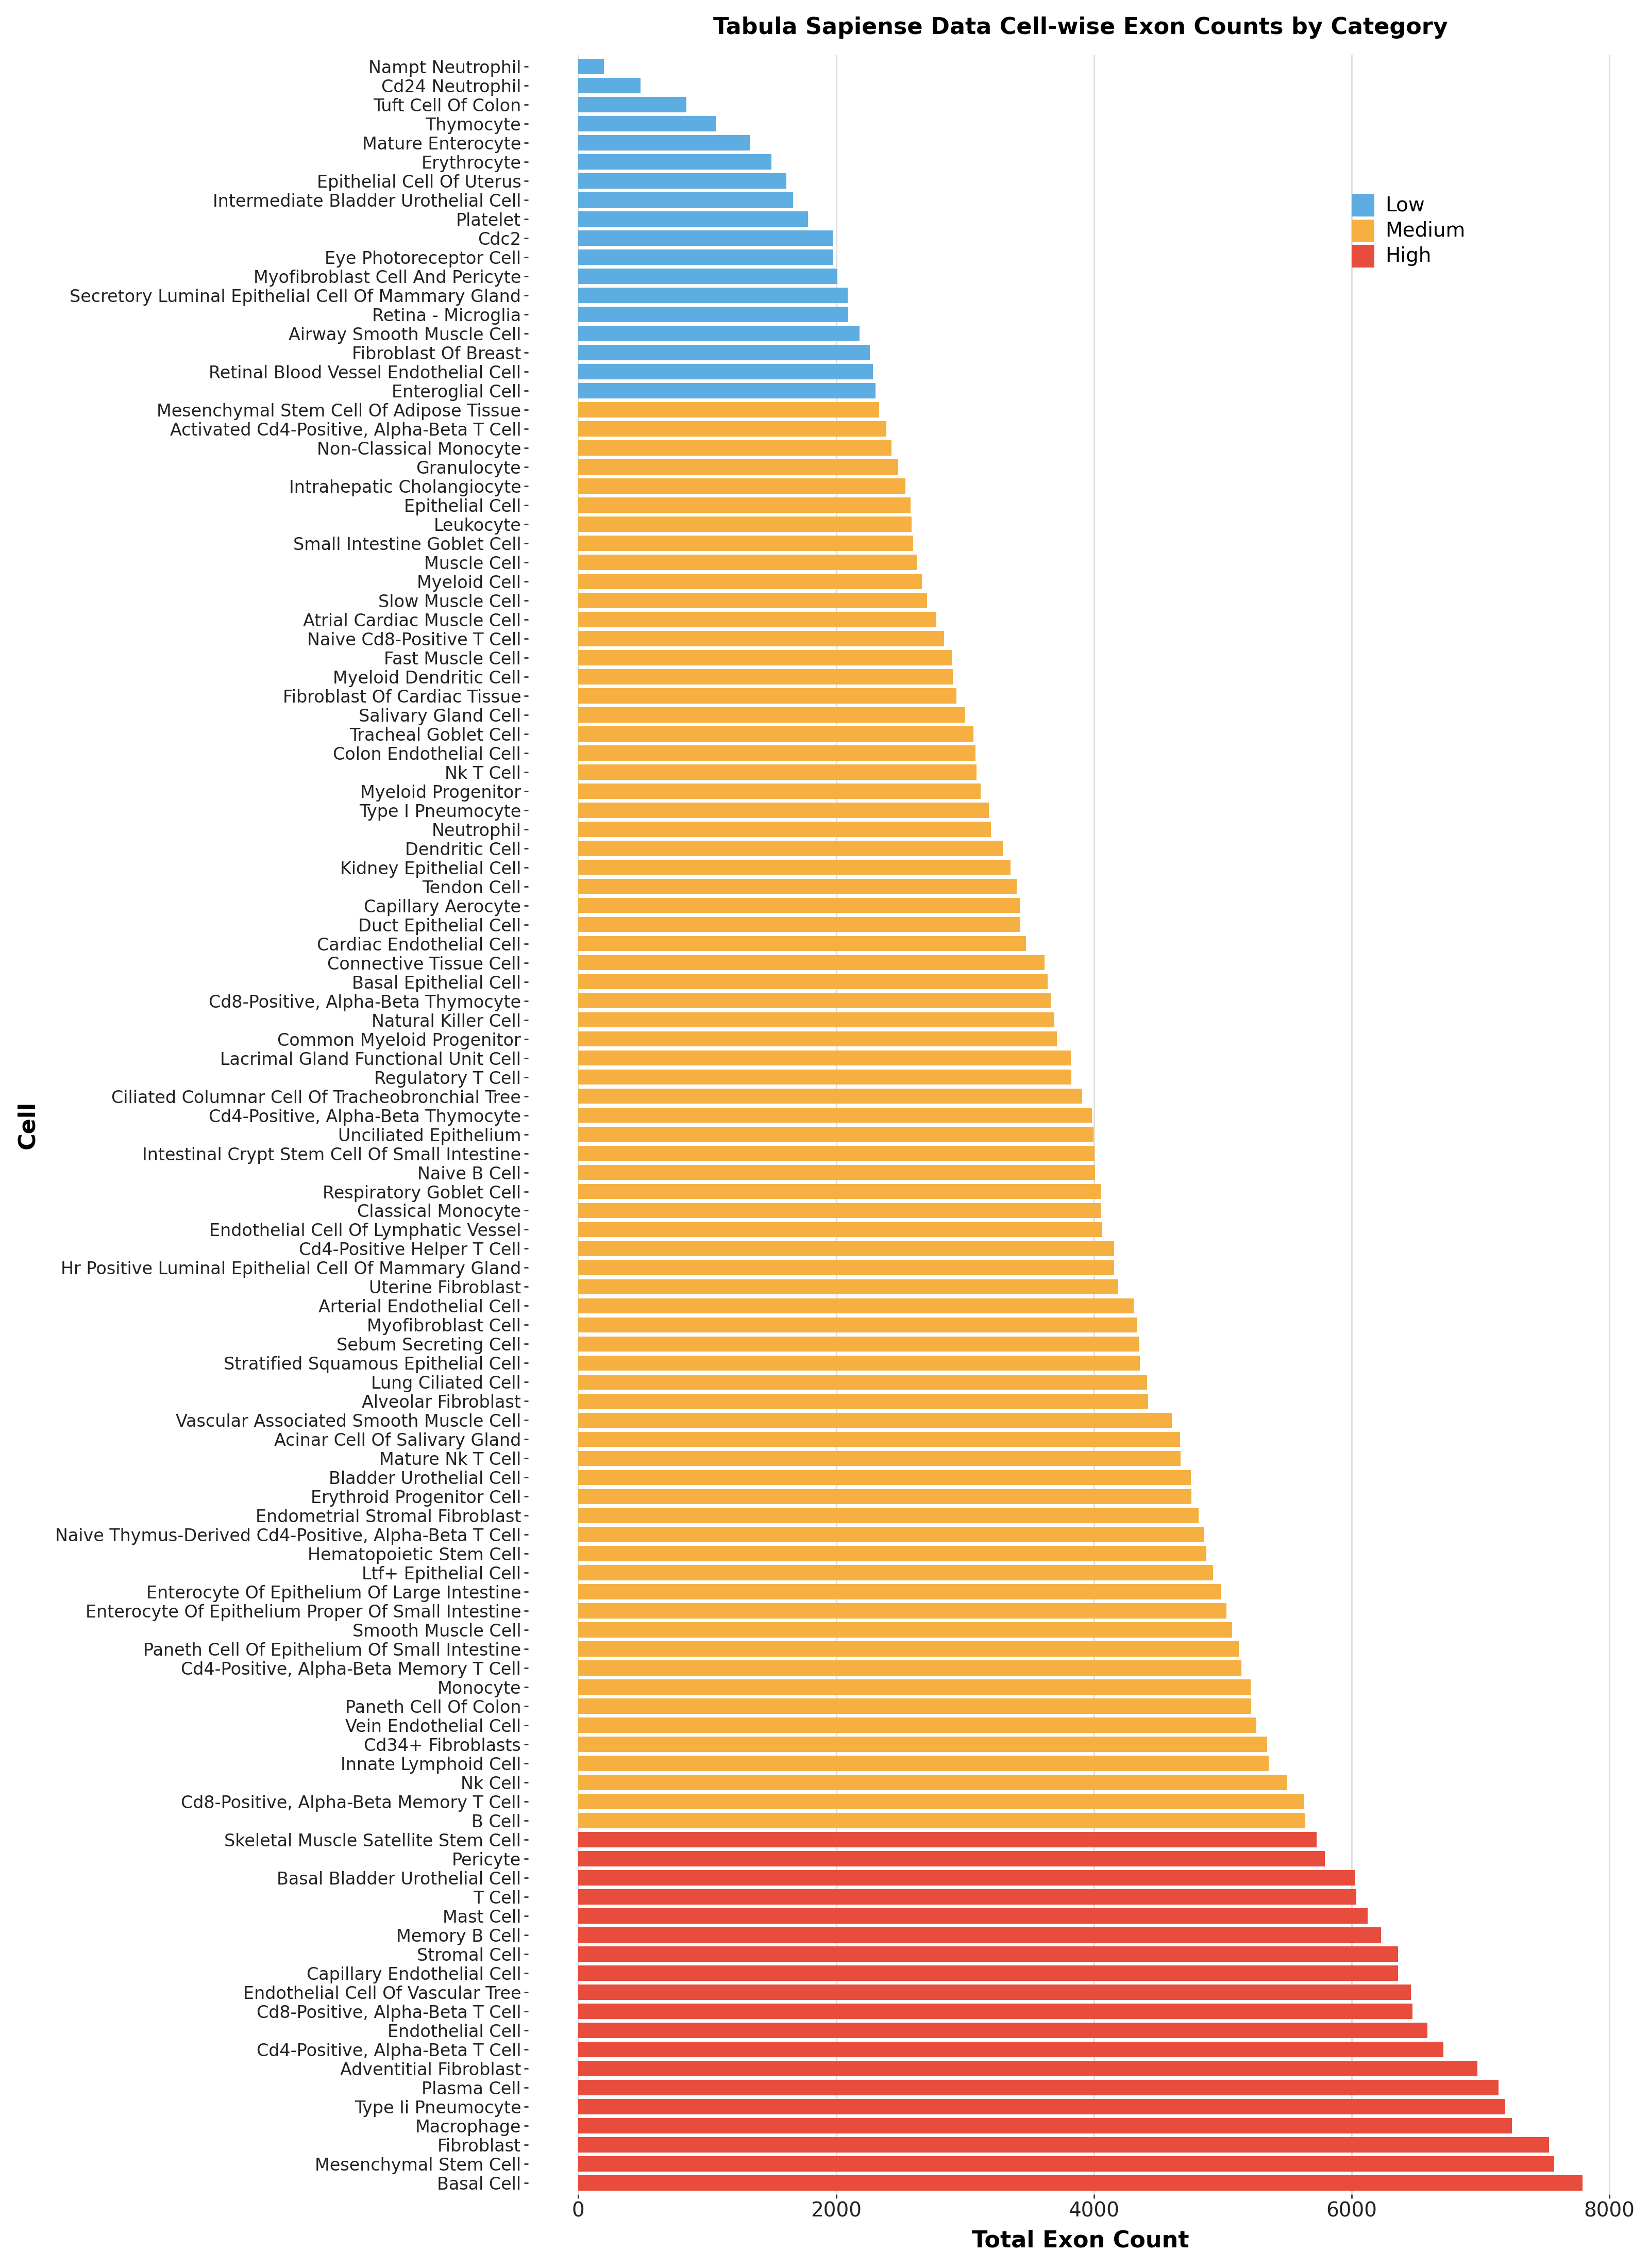

✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TS_tissue_counts_20251112_142820.png
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TS_tissue_counts_20251112_142820.pdf
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TS_tissue_counts_20251112_142820.svg
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TS_tissue_counts_20251112_142820.eps


In [75]:
TS_DATASET = "/gpfs/commons/home/atalukder/Contrastive_Learning/data/TS_data/tabula_sapiens/final_data/tissue_counts_detailed_ExonBinPsi.csv"
df = read_data(TS_DATASET)
plot_data(df, "TS")

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (
    ggplot, aes, geom_bar, coord_flip, scale_fill_manual,
    labs, theme_bw, theme, element_text, element_blank
)
import time

def plot_data_ASCOT(df, dataset_name):
    # === Color palette ===

    
    palette = {
    "Low": "#5DADE2",   # soft blue
    "Medium": "#F5B041", # amber
    "High": "#E74C3C"   # coral red
}

    # === Sort by SampleClass (Low → Medium → High) and within each by N_total ===
    # === Sort by SampleClass (Low → Medium → High) and within each by N_total ===
    class_order = ["Low sample", "Medium sample", "High sample"]
    df["Tissue"] = df["Tissue"].str.title()
    df["SampleClass"] = pd.Categorical(df["SampleClass"], categories=class_order, ordered=True)
    df = df.sort_values(["SampleClass", "N_total"], ascending=[True, True])
    df["SampleClass"] = df["SampleClass"].replace({
    "Low sample": "Low",
    "Medium sample": "Medium",
    "High sample": "High"
})

    # === Reverse tissue order for correct top→bottom display ===
    df["Tissue"] = pd.Categorical(df["Tissue"], categories=df["Tissue"].tolist()[::-1], ordered=True)
    

    # === Update figure size for readability ===
    p = (
        ggplot(df, aes(x="Tissue", y="N_total", fill="SampleClass"))
        + geom_bar(stat="identity", show_legend=True, width=0.8)
         + coord_flip()
        + scale_fill_manual(values=palette)
        + labs(
            title="ASCOT Data Tissue-wise Exon Counts by Category",
            x="Tissue",
            y="Total Exon Count",
            fill="Sample Class"
        )
        + theme_bw()
        + theme(
            figure_size=(10, 14),     # more horizontal room, enough vertical space
            subplots_adjust={'left': 0.15, 'right': 0.98, 'top': 0.95},  # give the title room
            legend_position=(0.9, 0.9),
            legend_justification=(1, 0),
            legend_background=element_blank(),
            legend_title=element_blank(),
            legend_text=element_text(size=14),
            axis_text_y=element_text(size=14, color="#222222"),
            axis_text_x=element_text(size=14, color="#222222"),
            axis_title_x=element_text(margin={'t': 8}, size=16, weight="bold"),
            axis_title_y=element_text(size=16, weight="bold"),
            plot_title=element_text(size=16, weight="bold", ha="left", margin={'b': 10}),
            panel_border=element_blank(),
            panel_grid_major_y=element_blank(),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_text(color="#dddddd"),
            panel_grid_minor_x=element_blank(),
        )
    )
    p.show()

    # === Render and save ===
    fig = p.draw()
    fig.set_size_inches(12, 14)  # match figure_size
    out_path = f"/gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_{dataset_name}_tissue_counts_{time.strftime('%Y%m%d_%H%M%S')}"

    for fmt in ['png', 'pdf', 'svg', 'eps']:
        fig.savefig(f"{out_path}.{fmt}", dpi=300, bbox_inches="tight", facecolor="white")
        print(f"✅ Saved: {out_path}.{fmt}")

    plt.close(fig)


/scratch/ipykernel_2385542/1403395037.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
/gpfs/commons/home/atalukder/miniconda3/envs/Myjupyterenv/lib/python3.10/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


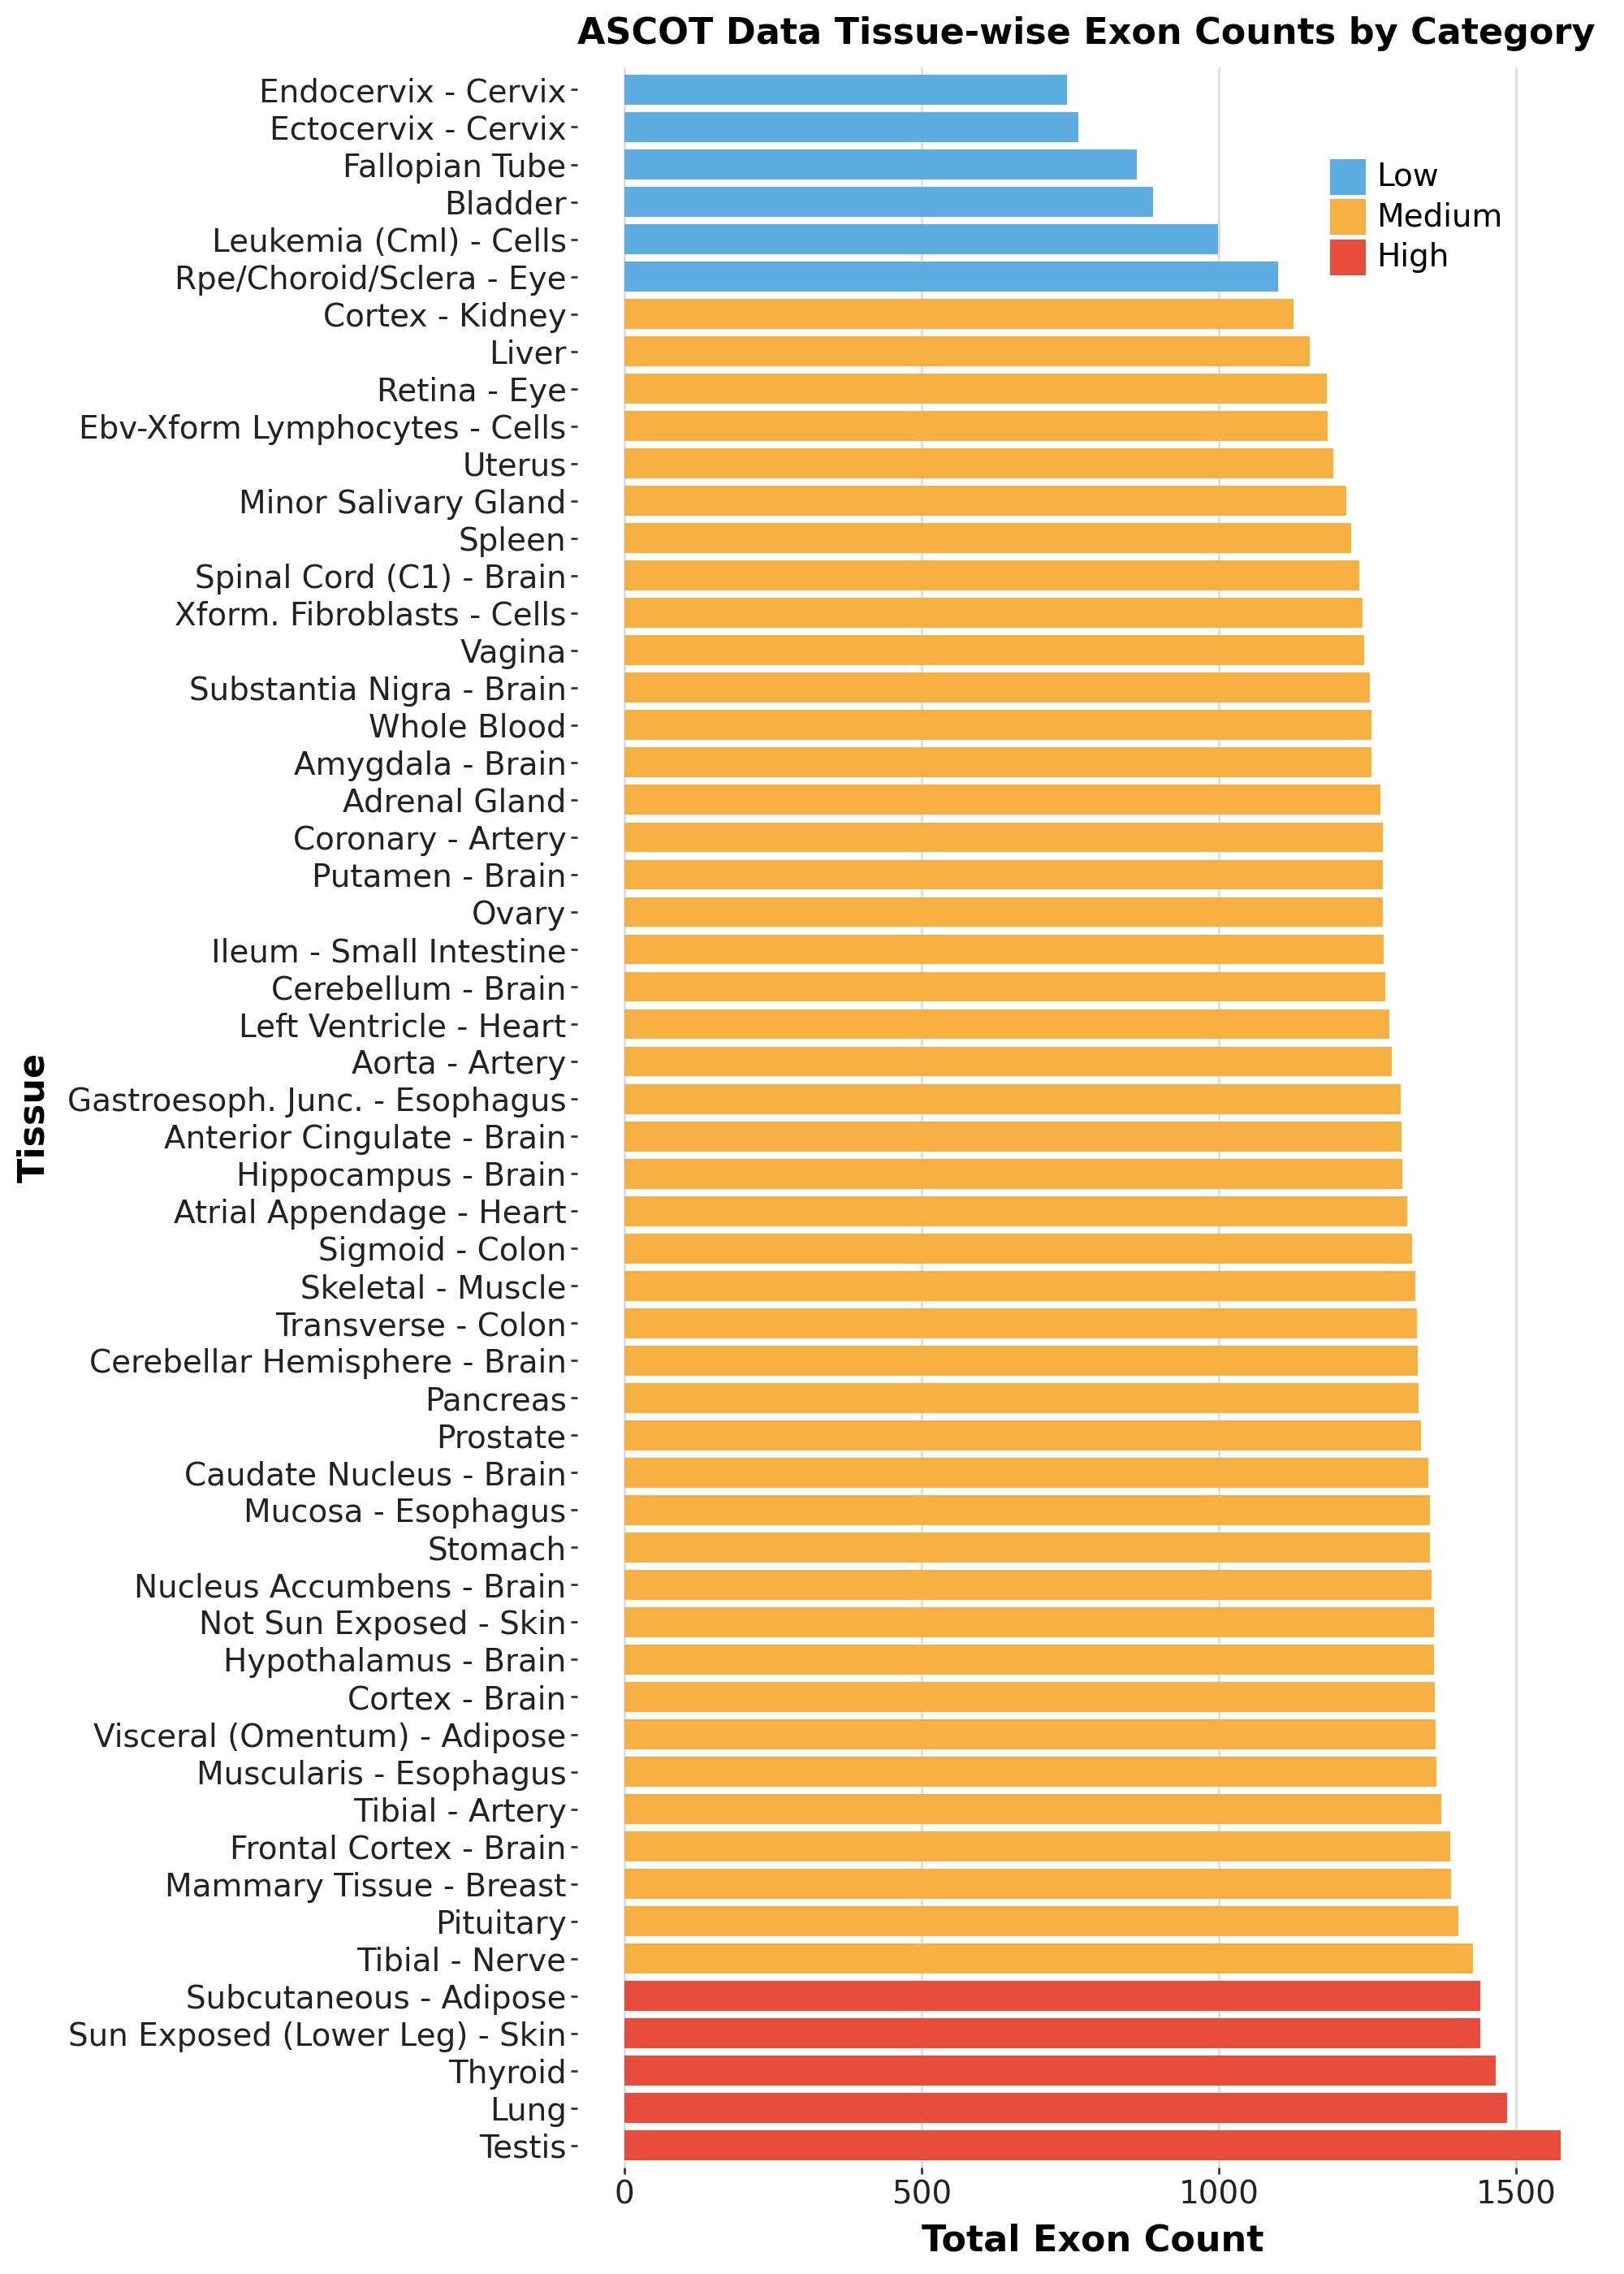

/gpfs/commons/home/atalukder/miniconda3/envs/Myjupyterenv/lib/python3.10/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_ASCOT_tissue_counts_20251112_142522.png
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_ASCOT_tissue_counts_20251112_142522.pdf
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_ASCOT_tissue_counts_20251112_142522.svg
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_ASCOT_tissue_counts_20251112_142522.eps


In [73]:
TS_DATASET = "/gpfs/commons/home/atalukder/Contrastive_Learning/data/ASCOT/tissue_counts_detailed_ExonBinPsi.csv"
df = read_data(TS_DATASET)
plot_data_ASCOT(df, "ASCOT")